In [1]:

%load_ext autoreload
%autoreload 2


In [2]:

import numpy as np
import h5py as h5

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "6"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


#RUN BEFORE#

In [3]:
#RUN AFTER#

import tensorflow.keras as keras
K = keras.backend
from util.Models import *

In [4]:

K.clear_session()
model = GarNetModel()


2023-05-15 16:56:33.921711: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-05-15 16:56:33.921776: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9671 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:b1:00.0, compute capability: 7.5


Model: "gar_net_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 4)]     0                                            
__________________________________________________________________________________________________
input_gex (GlobalExchange)      (None, 128, 8)       0           input_1[0][0]                    
__________________________________________________________________________________________________
input_batchnorm (BatchNormaliza (None, 128, 8)       32          input_gex[0][0]                  
__________________________________________________________________________________________________
input_dense (Dense)             (None, 128, 8)       72          input_batchnorm[0][0]            
______________________________________________________________________________________

In [5]:

with h5.File('events_0.h5', "r") as f:

    x = f['cluster'][()]
    y = np.concatenate((keras.utils.to_categorical(f['truth_pid'][()]),f['truth_energy'][()].reshape(-1,1)), axis=-1)


In [6]:
history = model.fit(x, y, 
                  epochs=100,
                  batch_size=20,
                  validation_split=0.2,
                  verbose=1) ## can put generators in for x and y

2023-05-15 16:56:35.881545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
400/400 [==============================] - 7s 10ms/step - loss: 0.6981 - val_loss: 0.6932
Epoch 2/100
400/400 [==============================] - 3s 8ms/step - loss: 0.6931 - val_loss: 0.6934
Epoch 3/100
400/400 [==============================] - 3s 9ms/step - loss: 0.6929 - val_loss: 0.6934
Epoch 4/100
400/400 [==============================] - 3s 9ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 5/100
400/400 [==============================] - 3s 9ms/step - loss: 0.6913 - val_loss: 0.7879
Epoch 6/100
400/400 [==============================] - 4s 9ms/step - loss: 0.6868 - val_loss: 0.8858
Epoch 7/100
400/400 [==============================] - 4s 9ms/step - loss: 0.6754 - val_loss: 0.6982
Epoch 8/100
400/400 [==============================] - 4s 9ms/step - loss: 0.6649 - val_loss: 0.7874
Epoch 9/100
400/400 [==============================] - 4s 9ms/step - loss: 0.6741 - val_loss: 0.7446
Epoch 10/100
400/400 [==============================] - 3s 9ms/step - loss: 0.6728 - val_l

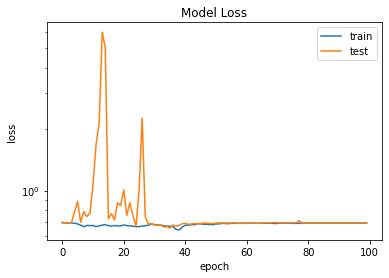

In [7]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'test'], loc='upper right')
plt.show()